# Isolation Forest

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('IP_Level_log_dataset_labeled.csv')

In [3]:
df

,IP Address,Total_Requests,DELETE_Perc,GET_Perc,POST_Perc,PUT_Perc,4xx_Perc,5xx_Perc,Other_Perc,Unique_User_Agents,Unique_Sessions,Unique_Locations,Top_User_Agent,Top_Location,Label
0,1.0.25.247,3,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.666667,2,3,3,Opera,Mongolia,1
1,1.1.180.252,4,0.250000,0.250000,0.500000,0.000000,0.250000,0.250000,0.500000,2,4,4,Firefox,Montenegro,1
2,1.1.21.105,7,0.142857,0.285714,0.428571,0.142857,0.428571,0.285714,0.285714,4,7,7,Safari,Australia,-1
3,1.1.62.217,4,0.000000,0.500000,0.250000,0.250000,0.000000,0.750000,0.250000,3,4,4,Chrome,Switzerland,1
4,1.100.140.68,4,0.000000,0.500000,0.500000,0.000000,0.500000,0.000000,0.500000,3,4,4,Bot,Belize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33975,99.96.176.36,5,0.400000,0.200000,0.400000,0.000000,0.200000,0.200000,0.600000,3,5,5,Firefox,Libyan Arab Jamahiriya,1
33976,99.97.118.185,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,1,1,Bot,Antarctica (the territory South of 60 deg S),1
33977,99.97.154.134,1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,1,1,Safari,USA,1
33978,99.99.53.56,6,0.333333,0.166667,0.166667,0.333333,0.333333,0.000000,0.666667,4,6,6,Safari,French Guiana,-1


In [4]:
true_labels = df['Label']

In [5]:
df_model = df.drop(columns=['Top_User_Agent', 'Top_Location', 'Label', 'IP Address'])

In [6]:
#Normalizing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_model)

In [7]:
df_model.head()

,Total_Requests,DELETE_Perc,GET_Perc,POST_Perc,PUT_Perc,4xx_Perc,5xx_Perc,Other_Perc,Unique_User_Agents,Unique_Sessions,Unique_Locations
0,3,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.666667,2,3,3
1,4,0.250000,0.250000,0.500000,0.000000,0.250000,0.250000,0.500000,2,4,4
2,7,0.142857,0.285714,0.428571,0.142857,0.428571,0.285714,0.285714,4,7,7
3,4,0.000000,0.500000,0.250000,0.250000,0.000000,0.750000,0.250000,3,4,4
4,4,0.000000,0.500000,0.500000,0.000000,0.500000,0.000000,0.500000,3,4,4


In [8]:
model = IsolationForest(
    n_estimators=500,          # Number of trees
    max_samples=2000,
    contamination=0.176,        
    random_state=60
)

In [9]:
model.fit(X_scaled)

IsolationForest(contamination=0.176, max_samples=2000, n_estimators=500,
                random_state=60)

In [10]:
predictions = model.predict(X_scaled)

In [11]:
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(true_labels, predictions))

Confusion Matrix:
 [[ 2338  3051]
 [ 3609 24982]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.39      0.43      0.41      5389
           1       0.89      0.87      0.88     28591

    accuracy                           0.80     33980
   macro avg       0.64      0.65      0.65     33980
weighted avg       0.81      0.80      0.81     33980



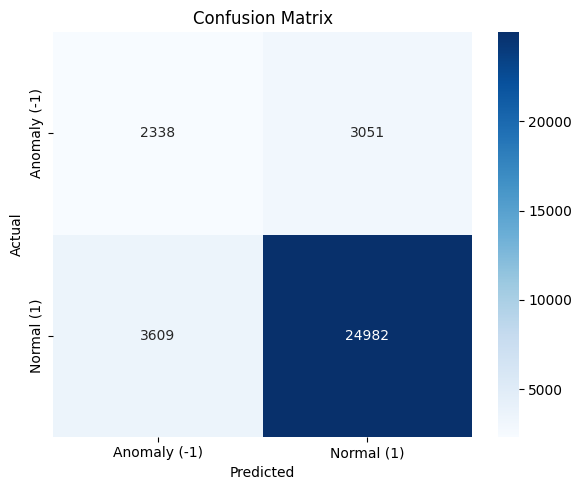

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Anomaly (-1)', 'Normal (1)'],
            yticklabels=['Anomaly (-1)', 'Normal (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


# RANDOM FOREST

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [88]:
df = pd.read_csv('IP_Level_log_dataset_labeled.csv')

In [89]:
features_to_drop = [
    'Label', 'Top_User_Agent', 'Top_Location',
    'IP Address','Unique_User_Agents', 'Unique_Sessions', 'Unique_Locations', 'Total_Requests'  
]

X = df.drop(columns=features_to_drop)
y = df['Label']


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1031  586]
 [ 302 8275]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.64      0.70      1617
           1       0.93      0.96      0.95      8577

    accuracy                           0.91     10194
   macro avg       0.85      0.80      0.82     10194
weighted avg       0.91      0.91      0.91     10194



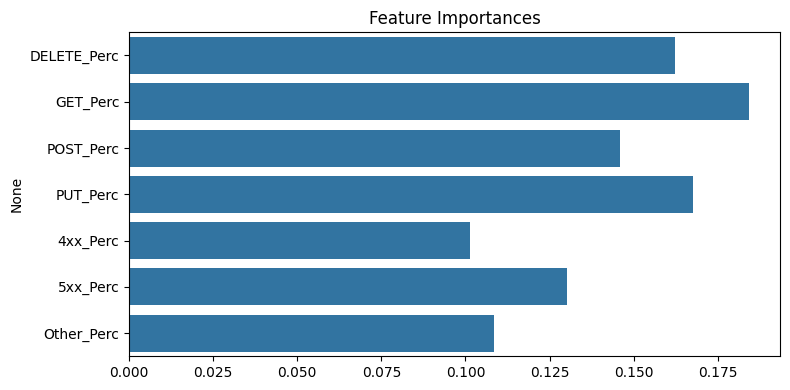

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os
joblib.dump(model, r"D:\IPCheck\Model\random_forest_model.joblib")